# Erwan LeCun
## PUI_HW4-2_ErwanLeCun

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#generate the distribution
dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_b = np.random.binomial(1, 0.5, 1000)

print "binomial on normal", scipy.stats.kstest(dist_b,'norm')
print "binomial on normal", scipy.stats.anderson(dist_b, dist='norm')
print "" 

dist_p = np.random.poisson(1, 1000)
print "poisson on normal", scipy.stats.kstest(dist_p,'norm')
print "poisson on normal", scipy.stats.anderson(dist_p, dist='norm')
print "" 

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

##what is this threshold I am saving??

normal on normal (0.017588930381936763, 0.91644338818400883)
normal on normal (0.31718218053447345, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

binomial on normal (0.5, 0.0)
binomial on normal (179.61433865080653, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal (0.5, 0.0)
poisson on normal (65.561844778872, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

[ 1.088]


##KS Test: 
####Null Hypothesis: the two distributions are drawn from the same parent distribution.
####Alternative Hypothesis: the two distributions are not drawn from the same parent distribution.
## Anderson-Darling Test: 
####Null Hypothesis: the sample data is derived from a specific input distribution.
####Alternative Hypothesis: the sample data is not derived from a specific input distribution.

##The threshold is the cut-off value for the arrays of significance values. Here, a threshold of 1 means that our significance level is = to 1%
## Normal on Normal (KS):
####We do not reject the null hypothesis that the two distributions are drawn from the same parent distribution. This makes sense, since normal = normal. (High p-value)
## Normal on Normal (AD):
####We do not reject the null hypothesis that the sample data is derived from a specific input distribution. This makes sense, since normal = normal. (Low AD coefficient)
## Binomial on Normal (KS):
####We reject the null hypothesis that the two distributions (binomial, normal) are drawn from the same parent distribution. (Low p-value)
## Binomial on Normal (AD):
####We reject the null hypothesis that this sample data (binomial) is derived from a specific input distribution (normal). (High AD coefficient)
## Poisson on Normal (KS):
####We reject the null hypothesis that the two distributions (poisson, normal) are drawn from the same parent distribution. (Low p-value)
## Poisson on Normal (AD):
####We reject the null hypothesis that this sample data (poisson) is derived from a specific input distribution (normal). (High AD coefficient)

In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)
#notice the extra comma on the left side of the '=' sign: that tells numpy take the first two values returned, and throw away the rest

In [4]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "binomial on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 
print "poisson on normal", scipy.stats.entropy(distpdf_p, scipy.stats.norm.pdf(bincenters_p)) 

#you can interpret this as a distance: it increases as the distributions diverge

normal on normal 0.00520392983525
binomial on normal 1.67494763974
poisson on normal 0.801596780053


## KL Divergence Test:
#### Null Hypothesis: there is no difference between the two probability distributions.
#### Alternative Hypothesis: there is a difference between the two probability distributions.
## Normal on Normal:
#### We do not reject the null hypothesis that there is no difference between the two probability distributions. (Low value)
## Binomial on Normal:
#### We reject the null hypothesis that there is no difference between the two probability distributions. (High value)
## Poisson on Normal:
#### We reject the null hypothesis that there is no difference between the two probability distributions. (High value)

In [5]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match
p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... just so you know.
    #if i%10 == 0: 
    #    print n
    #    pl.figure()
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, 1000*scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1-p)))
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

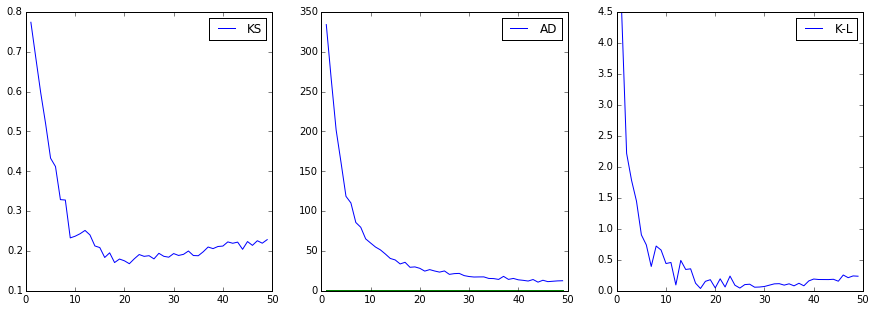

In [6]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

##These graphs show that as the n of the binomial distribution increases, the relative coefficients of the statistical tests decrease. This means that as n increases, the binomial distribution become more and more normal. This is what we'd expect, as per the Central Limit Theorem.

In [7]:
#to store the data i am generating an empty array of the size of the values of n i want to test. i do that with np.zeros which takes the length of the array as argument, and the data type as optional argument, but default is float, which is fine by me, so i do not need any argument other then the lenght 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


#then i put the tests in a for loop so that i can generate a distribution for given parameters once, 
#and run all tests against it
#now the valus that i want to plot depends on how i intend to describe the plot, and viceversa. 

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match

for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

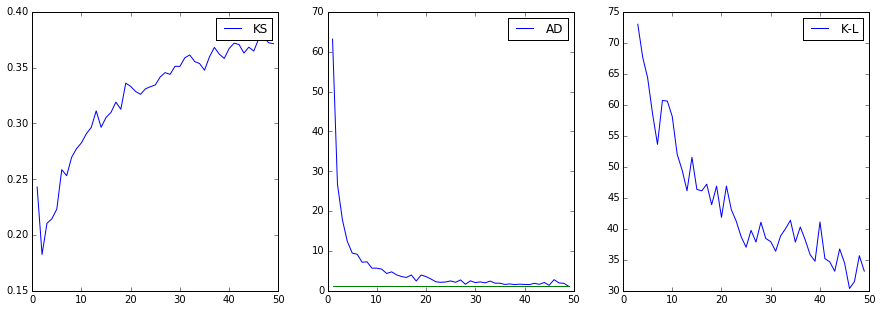

In [8]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

##These graphs show the same result as for the binomial distribution, except this time they describe a poisson distribution. The idea again is that as the mean increases, the poisson distribution become more and more normal (as per the CLT). The KS graph here, however, is sloping in the wrong direction. This is because the KS test is often inconsistent and may not be reliable.